In [8]:
#importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
import keras 

In [10]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#dataset
data = pd.read_csv('data.csv')

In [12]:
#to check dimension of data
data.shape

(11500, 179)

In [13]:
data.head(40)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,55,28,18,16,16,19,25,40,52,66,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,-55,-9,52,111,135,129,103,72,37,0,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,8,15,13,3,-6,-8,-5,4,25,41,...,49,31,11,-5,-17,-19,-15,-15,-11,4


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


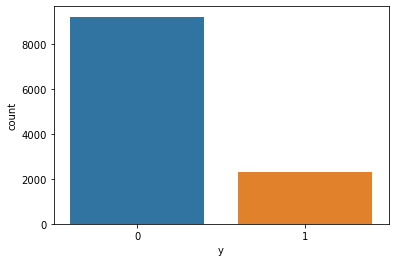

In [14]:
cols = data.columns
tgt = data.y
tgt[tgt>1]=0
ax = sns.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [16]:
#Data preprocessing involves (1) Dividing the data into attributes and labels 
#(2) dividing the data into training and testing sets.
X = data.drop('y', axis=1)#columns of the data dataframe are being stored in the X variable except the "class" column, which is the label column. The drop() method drops this column.
y = data['y']#the class column is being stored in the y variable



In [17]:
score_p = []

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,random_state=109)#train_test_split method that allows us to seamlessly divide data into training and test sets

In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
predicted=knn.predict(X_test)

In [20]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,predicted))
score_p.append(metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9134782608695652


In [21]:
#save model
import pickle
with open('model_knn.pkl','wb') as f:
    pickle.dump(knn,f)

In [22]:

# load the model from disk
with open('model_knn.pkl','rb') as f:
    mp=pickle.load(f)

In [23]:
pred=mp.predict([[100,190,229,220,192,120,0,-9,0,-8,-10,0,60,110,102,160,127,0,-7,-121,-108,-120,-101,0,11,9,20,8,60,6,10,-19,-61,-96,-100,-102,-116,-110,-71,-10,20,19,6,9,21,10,-7,-8,0,0,7,80,101,88,70,69,1,-10,-1,-61,-80,-77,-66,0,0,87,129,121,88,12,-76,-100,-207,-186,-160,-108,-100,0,0,90,70,8,-81,-100,-227,-262,-200,-218,-187,-126,-60,-12,27,61,9,9,-6,-120,-210,-281,-260,-181,-89,0,0,0,8,0,1,0,9,-7,0,-70,-80,-101,-70,-11,2,62,66,70,60,9,6,6,-11,0,0,-20,8,2,77,100,100,121,79,9,0,0,90,111,107,60,2,18,-20,-69,-60,0,0,-7,-88,-110,-100,-110,-80,0,-79,-72,-80,-109,-98,-72,-60,-60,-11,10,8,-17,-10,-1,-77,-100,-127,-116,-80,-1]])

In [24]:
print('No Epilepsy'if pred[0]==0 else 'Epilepsy detected')

No Epilepsy


In [25]:
pred=mp.predict([[86,82,6,1,20,10,7,272,200,202,207,208,212,2,-267,-600,-800,-1001,-1109,-1090,-967,-706,-60,-102,118,18,27,70,80,7,97,9,12,10,26,0,2,20,10,12,9,9,0,297,290,290,290,286,279,280,1,8,280,202,210,190,169,111,-70,-88,-679,-892,-909,-972,-1001,-1006,-909,-807,-668,-2,-100,72,226,26,92,61,90,10,11,96,79,0,0,27,10,99,80,80,0,2,0,7,18,92,70,60,60,72,80,88,80,71,60,0,0,0,202,200,100,101,100,8,-206,-8,-809,-1067,-1069,-907,-780,-97,-60,-7,-276,-220,-210,0,-900,-1010,-1716,-1060,-662,-96,200,20,201,29,-167,-228,-106,27,106,229,269,297,7,0,0,6,7,280,201,109,80,1,0,62,60,60,69,89,120,106,127,102,90,100,101,160,168,160,100,106,102,107,106,100,100,129]])

In [26]:
print('No Epilepsy'if pred[0]==0 else 'Epilepsy detected')

No Epilepsy


In [27]:
#Naive Bayes
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()


gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)

In [28]:

from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
score_p.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.957391304347826


In [29]:
gnb.predict([[100,190,229,220,192,120,0,-9,0,-8,-10,0,60,110,102,160,127,0,-7,-121,-108,-120,-101,0,11,9,20,8,60,6,10,-19,-61,-96,-100,-102,-116,-110,-71,-10,20,19,6,9,21,10,-7,-8,0,0,7,80,101,88,70,69,1,-10,-1,-61,-80,-77,-66,0,0,87,129,121,88,12,-76,-100,-207,-186,-160,-108,-100,0,0,90,70,8,-81,-100,-227,-262,-200,-218,-187,-126,-60,-12,27,61,9,9,-6,-120,-210,-281,-260,-181,-89,0,0,0,8,0,1,0,9,-7,0,-70,-80,-101,-70,-11,2,62,66,70,60,9,6,6,-11,0,0,-20,8,2,77,100,100,121,79,9,0,0,90,111,107,60,2,18,-20,-69,-60,0,0,-7,-88,-110,-100,-110,-80,0,-79,-72,-80,-109,-98,-72,-60,-60,-11,10,8,-17,-10,-1,-77,-100,-127,-116,-80,-1]])

array([0], dtype=int64)

In [30]:
gnb.predict([[86,82,6,1,20,10,7,272,200,202,207,208,212,2,-267,-600,-800,-1001,-1109,-1090,-967,-706,-60,-102,118,18,27,70,80,7,97,9,12,10,26,0,2,20,10,12,9,9,0,297,290,290,290,286,279,280,1,8,280,202,210,190,169,111,-70,-88,-679,-892,-909,-972,-1001,-1006,-909,-807,-668,-2,-100,72,226,26,92,61,90,10,11,96,79,0,0,27,10,99,80,80,0,2,0,7,18,92,70,60,60,72,80,88,80,71,60,0,0,0,202,200,100,101,100,8,-206,-8,-809,-1067,-1069,-907,-780,-97,-60,-7,-276,-220,-210,0,-900,-1010,-1716,-1060,-662,-96,200,20,201,29,-167,-228,-106,27,106,229,269,297,7,0,0,6,7,280,201,109,80,1,0,62,60,60,69,89,120,106,127,102,90,100,101,160,168,160,100,106,102,107,106,100,100,129]])

array([1], dtype=int64)

In [31]:
#save model
import pickle
with open('model_gnb.pkl','wb') as f:
    pickle.dump(gnb,f)

In [32]:

# load the model from disk
with open('model_gnb.pkl','rb') as f:
    mp=pickle.load(f)

In [33]:
pred=mp.predict([[100,190,229,220,192,120,0,-9,0,-8,-10,0,60,110,102,160,127,0,-7,-121,-108,-120,-101,0,11,9,20,8,60,6,10,-19,-61,-96,-100,-102,-116,-110,-71,-10,20,19,6,9,21,10,-7,-8,0,0,7,80,101,88,70,69,1,-10,-1,-61,-80,-77,-66,0,0,87,129,121,88,12,-76,-100,-207,-186,-160,-108,-100,0,0,90,70,8,-81,-100,-227,-262,-200,-218,-187,-126,-60,-12,27,61,9,9,-6,-120,-210,-281,-260,-181,-89,0,0,0,8,0,1,0,9,-7,0,-70,-80,-101,-70,-11,2,62,66,70,60,9,6,6,-11,0,0,-20,8,2,77,100,100,121,79,9,0,0,90,111,107,60,2,18,-20,-69,-60,0,0,-7,-88,-110,-100,-110,-80,0,-79,-72,-80,-109,-98,-72,-60,-60,-11,10,8,-17,-10,-1,-77,-100,-127,-116,-80,-1]])

In [34]:
print('No Epilepsy'if pred[0]==0 else 'Epilepsy detected')

No Epilepsy


In [35]:
pred=mp.predict([[86,82,6,1,20,10,7,272,200,202,207,208,212,2,-267,-600,-800,-1001,-1109,-1090,-967,-706,-60,-102,118,18,27,70,80,7,97,9,12,10,26,0,2,20,10,12,9,9,0,297,290,290,290,286,279,280,1,8,280,202,210,190,169,111,-70,-88,-679,-892,-909,-972,-1001,-1006,-909,-807,-668,-2,-100,72,226,26,92,61,90,10,11,96,79,0,0,27,10,99,80,80,0,2,0,7,18,92,70,60,60,72,80,88,80,71,60,0,0,0,202,200,100,101,100,8,-206,-8,-809,-1067,-1069,-907,-780,-97,-60,-7,-276,-220,-210,0,-900,-1010,-1716,-1060,-662,-96,200,20,201,29,-167,-228,-106,27,106,229,269,297,7,0,0,6,7,280,201,109,80,1,0,62,60,60,69,89,120,106,127,102,90,100,101,160,168,160,100,106,102,107,106,100,100,129]])

In [36]:
print('No Epilepsy'if pred[0]==0 else 'Epilepsy detected')

Epilepsy detected


In [37]:
#exceptionpart-ANN

In [38]:
classifier = Sequential()

In [39]:
classifier.add(Dense(units = 80, activation = 'relu', input_dim = 178))
classifier.add(Dense(units = 80, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [40]:
classifier.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                14320     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 81        
Total params: 20,881
Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________


In [111]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
920/920 [==============================] - 1s 1ms/step - loss: 5.8377 - accuracy: 0.7280
Epoch 2/100
920/920 [==============================] - 1s 1ms/step - loss: 2.1122 - accuracy: 0.8101
Epoch 3/100
920/920 [==============================] - 1s 1ms/step - loss: 1.1983 - accuracy: 0.8450
Epoch 4/100
920/920 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.8816
Epoch 5/100
920/920 [==============================] - 1s 1ms/step - loss: 0.3902 - accuracy: 0.9105
Epoch 6/100
920/920 [==============================] - 1s 1ms/step - loss: 0.2270 - accuracy: 0.9411
Epoch 7/100
920/920 [==============================] - 1s 1ms/step - loss: 0.1928 - accuracy: 0.9478
Epoch 8/100
920/920 [==============================] - 1s 1ms/step - loss: 0.1384 - accuracy: 0.9616
Epoch 9/100
920/920 [==============================] - 1s 1ms/step - loss: 0.1156 - accuracy: 0.9699
Epoch 10/100
920/920 [==============================] - 1s 1ms/step - loss: 0.1177 - accura

In [112]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
acc_ANN = classifier.evaluate(X_train, y_train)

288/288 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9961
